In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("screentime_analysis.csv")
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [5]:
df.shape

(200, 5)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             200 non-null    datetime64[ns]
 1   App              200 non-null    object        
 2   Usage (minutes)  200 non-null    int64         
 3   Notifications    200 non-null    int64         
 4   Times Opened     200 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ KB


In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,200,2024-08-16 17:16:48,2024-08-01 00:00:00,2024-08-09 00:00:00,2024-08-18 00:00:00,2024-08-25 00:00:00,2024-08-30 00:00:00,NaN
Usage (minutes),200.0,37.75,1.0,17.0,26.0,51.25,119.0,29.711299
Notifications,200.0,28.735,0.0,1.75,11.5,47.0,147.0,35.801726
Times Opened,200.0,21.63,1.0,4.0,10.0,32.0,99.0,24.27301


In [13]:
df['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

In [15]:
apps = df['App'].unique()
apps

array(['Instagram', 'X', 'WhatsApp', '8 Ball Pool', 'Safari', 'Netflix',
       'Facebook', 'LinkedIn'], dtype=object)

In [17]:
df.sort_values(by=['Date'],inplace = True)

In [19]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
25,2024-08-01,X,39,11,13
179,2024-08-01,LinkedIn,10,6,6
34,2024-08-01,X,17,41,19
106,2024-08-01,Safari,8,1,3
32,2024-08-01,X,30,27,9


In [21]:
df['Date'].unique()

<DatetimeArray>
['2024-08-01 00:00:00', '2024-08-02 00:00:00', '2024-08-03 00:00:00',
 '2024-08-04 00:00:00', '2024-08-05 00:00:00', '2024-08-06 00:00:00',
 '2024-08-07 00:00:00', '2024-08-08 00:00:00', '2024-08-09 00:00:00',
 '2024-08-10 00:00:00', '2024-08-11 00:00:00', '2024-08-12 00:00:00',
 '2024-08-13 00:00:00', '2024-08-14 00:00:00', '2024-08-15 00:00:00',
 '2024-08-16 00:00:00', '2024-08-17 00:00:00', '2024-08-18 00:00:00',
 '2024-08-19 00:00:00', '2024-08-20 00:00:00', '2024-08-21 00:00:00',
 '2024-08-22 00:00:00', '2024-08-23 00:00:00', '2024-08-24 00:00:00',
 '2024-08-25 00:00:00', '2024-08-26 00:00:00', '2024-08-27 00:00:00',
 '2024-08-28 00:00:00', '2024-08-29 00:00:00', '2024-08-30 00:00:00']
Length: 30, dtype: datetime64[ns]

In [23]:
df['Total Usage per App'] = df.groupby(['Date','App'])['Usage (minutes)'].transform('sum')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,Total Usage per App
25,2024-08-01,X,39,11,13,127
179,2024-08-01,LinkedIn,10,6,6,10
34,2024-08-01,X,17,41,19,127
106,2024-08-01,Safari,8,1,3,8
32,2024-08-01,X,30,27,9,127


In [25]:
df['Notifications'] = df.groupby(['Date','App'])['Notifications'].transform('sum')
df.head()


,Date,App,Usage (minutes),Notifications,Times Opened,Total Usage per App
25,2024-08-01,X,39,88,13,127
179,2024-08-01,LinkedIn,10,6,6,10
34,2024-08-01,X,17,88,19,127
106,2024-08-01,Safari,8,1,3,8
32,2024-08-01,X,30,88,9,127


In [27]:
df['Times Opened'] = df.groupby(['Date','App'])['Times Opened'].transform('sum')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,Total Usage per App
25,2024-08-01,X,39,88,55,127
179,2024-08-01,LinkedIn,10,6,6,10
34,2024-08-01,X,17,88,55,127
106,2024-08-01,Safari,8,1,3,8
32,2024-08-01,X,30,88,55,127


In [29]:
df['Total Usage per Day'] = df.groupby(['Date'])['Usage (minutes)'].transform('sum')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened,Total Usage per App,Total Usage per Day
25,2024-08-01,X,39,88,55,127,300
179,2024-08-01,LinkedIn,10,6,6,10,300
34,2024-08-01,X,17,88,55,127,300
106,2024-08-01,Safari,8,1,3,8,300
32,2024-08-01,X,30,88,55,127,300


In [31]:
df.drop(['Usage (minutes)'],inplace= True, axis=1)
df.head()

,Date,App,Notifications,Times Opened,Total Usage per App,Total Usage per Day
25,2024-08-01,X,88,55,127,300
179,2024-08-01,LinkedIn,6,6,10,300
34,2024-08-01,X,88,55,127,300
106,2024-08-01,Safari,1,3,8,300
32,2024-08-01,X,88,55,127,300


In [33]:
print(df.shape)
df = df.drop_duplicates()
df.shape

(200, 6)


(136, 6)

In [35]:
df.isnull().sum()

Date                   0
App                    0
Notifications          0
Times Opened           0
Total Usage per App    0
Total Usage per Day    0
dtype: int64

In [37]:
df.head(10)


,Date,App,Notifications,Times Opened,Total Usage per App,Total Usage per Day
25,2024-08-01,X,88,55,127,300
179,2024-08-01,LinkedIn,6,6,10,300
106,2024-08-01,Safari,1,3,8,300
89,2024-08-01,8 Ball Pool,5,25,47,300
127,2024-08-01,Netflix,0,2,108,300
199,2024-08-02,LinkedIn,4,1,13,30
101,2024-08-02,Safari,0,9,17,30
95,2024-08-03,8 Ball Pool,19,45,61,338
135,2024-08-03,Netflix,1,8,176,338
162,2024-08-03,Facebook,38,20,32,338


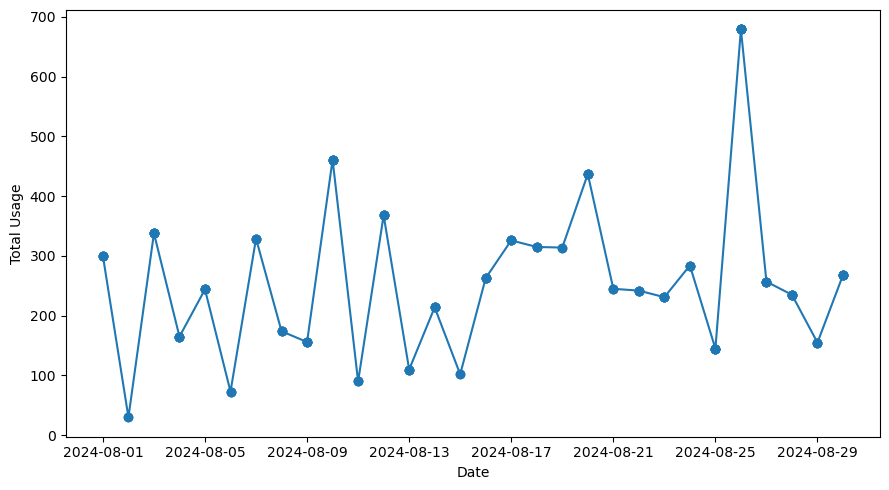

In [39]:
plt.figure(figsize=(9,5))
plt.plot(df['Date'],df['Total Usage per Day'],marker='o')
plt.xlabel("Date")
plt.ylabel("Total Usage")
plt.tight_layout()
plt.show()

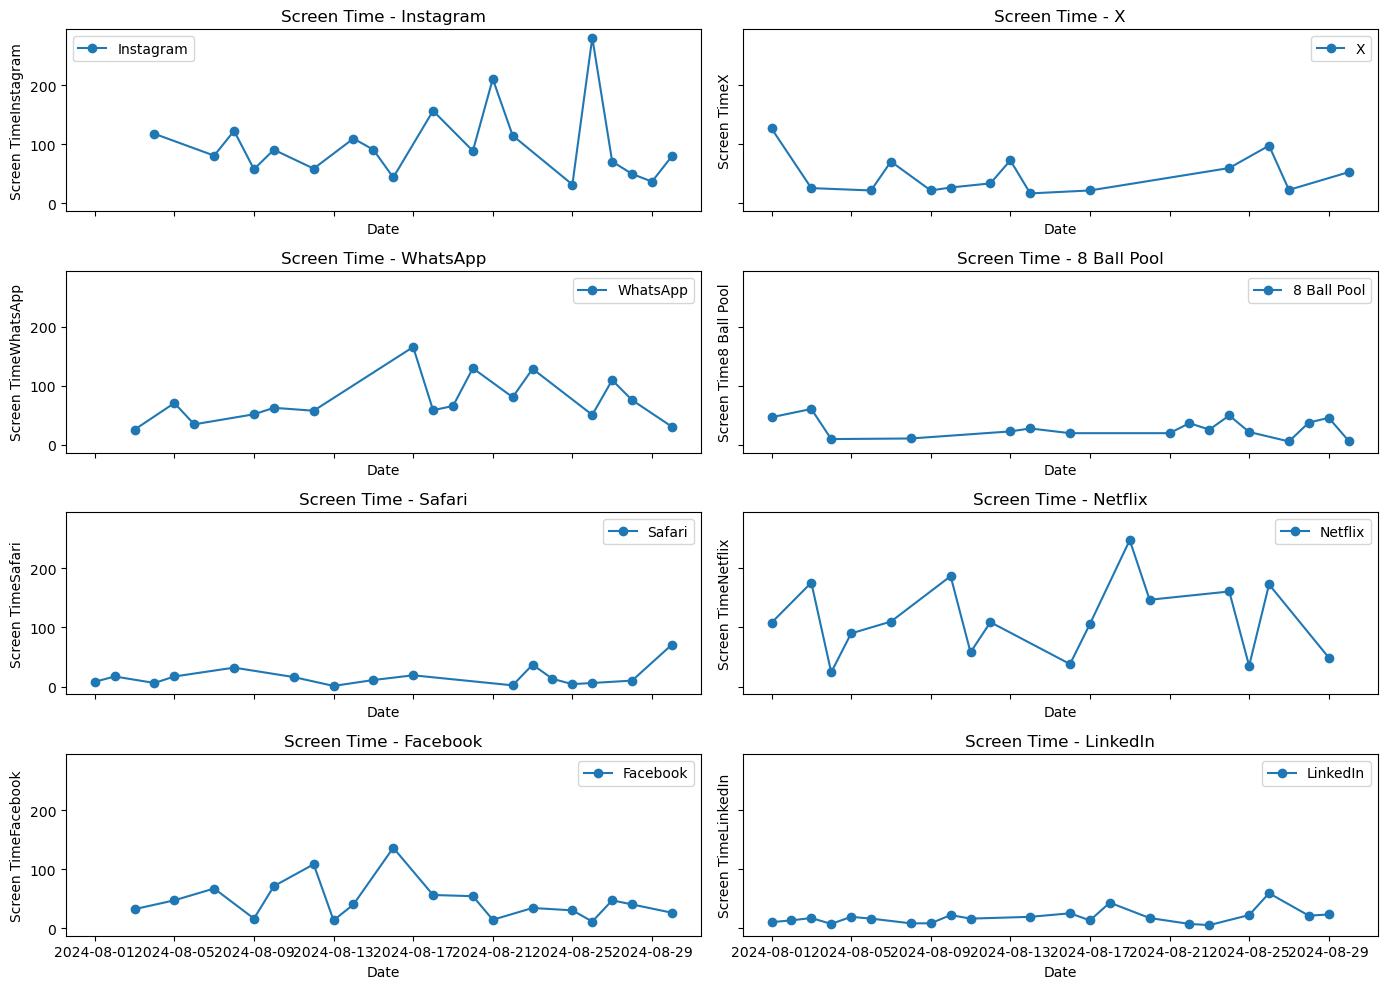

In [41]:
len_apps = len(apps)
fig,axes = plt.subplots(nrows=(len_apps + 1) // 2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, app in enumerate(apps):
    app_data = df[df['App'] == app]
    axes[i].plot(app_data['Date'], app_data['Total Usage per App'], marker='o', label=app)
    axes[i].set_title(f"Screen Time - {app}", fontsize=12)
    axes[i].set_xlabel("Date", fontsize=10)
    axes[i].set_ylabel(f"Screen Time{app}", fontsize=10)
    axes[i].legend()

plt.tight_layout()
plt.show()

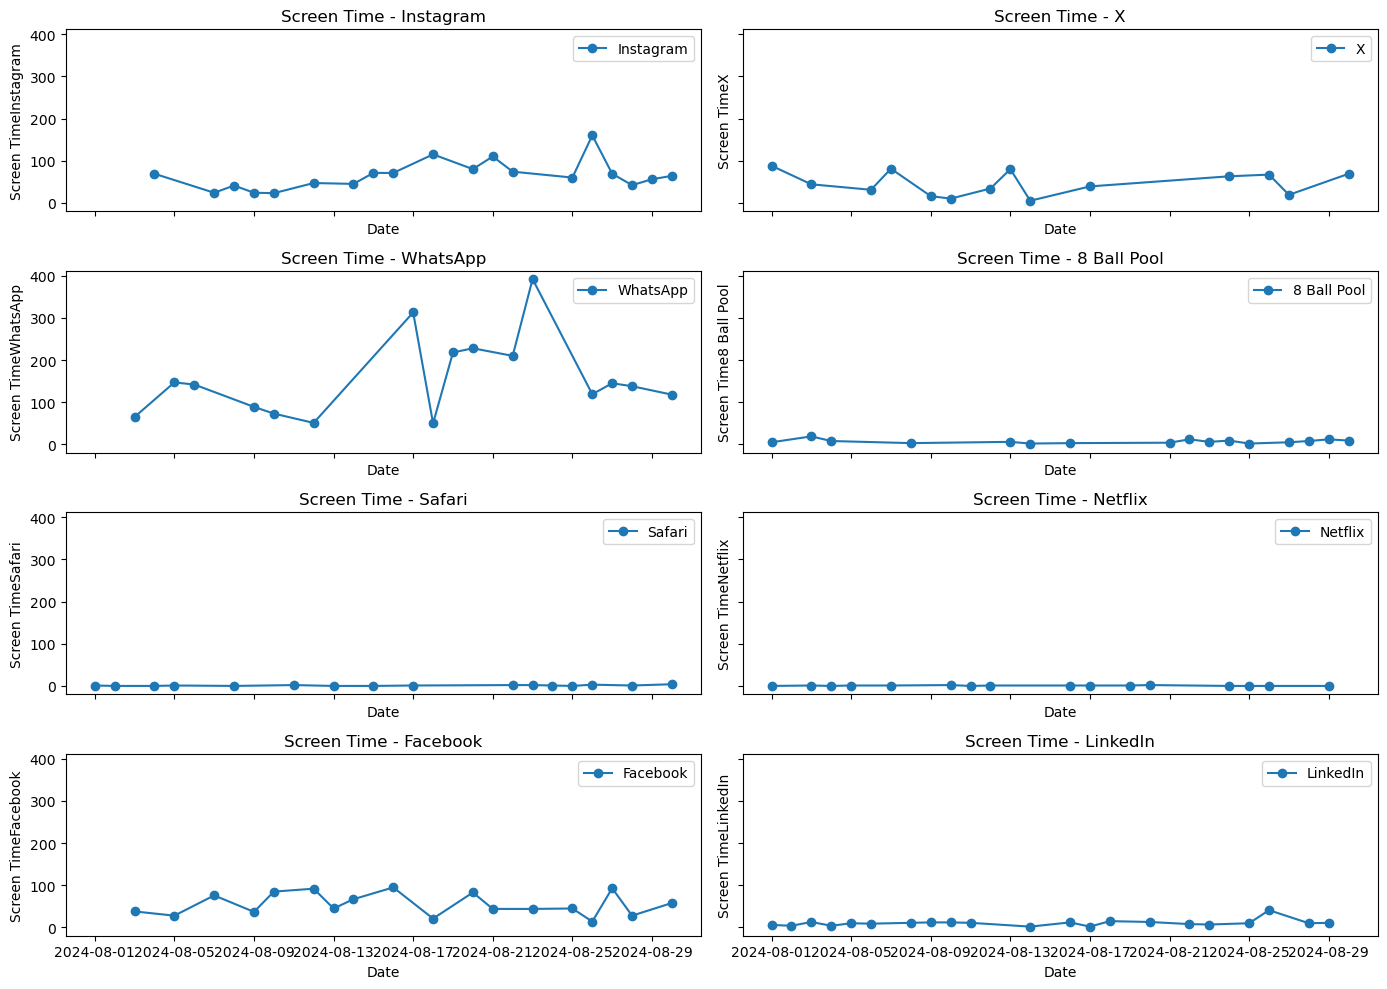

In [43]:
len_apps = len(apps)
fig,axes = plt.subplots(nrows=(len_apps + 1) // 2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, app in enumerate(apps):
    app_data = df[df['App'] == app]
    axes[i].plot(app_data['Date'], app_data['Notifications'], marker='o', label=app)
    axes[i].set_title(f"Screen Time - {app}", fontsize=12)
    axes[i].set_xlabel("Date", fontsize=10)
    axes[i].set_ylabel(f"Screen Time{app}", fontsize=10)
    axes[i].legend()

plt.tight_layout()
plt.show()

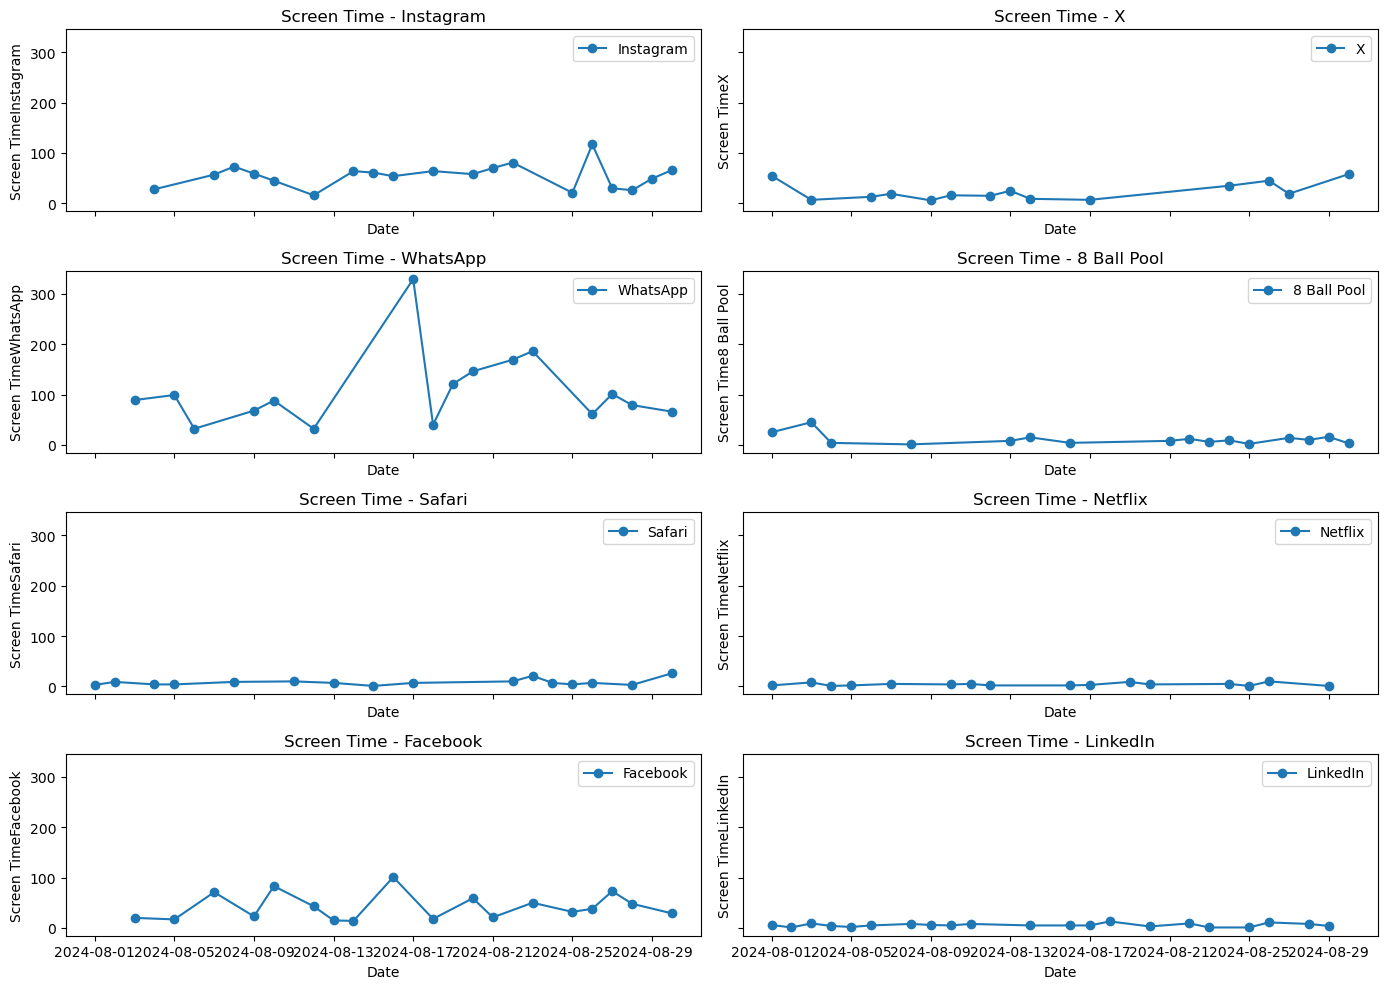

In [45]:
len_apps = len(apps)
fig,axes = plt.subplots(nrows=(len_apps + 1) // 2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, app in enumerate(apps):
    app_data = df[df['App'] == app]
    axes[i].plot(app_data['Date'], app_data['Times Opened'], marker='o', label=app)
    axes[i].set_title(f"Screen Time - {app}", fontsize=12)
    axes[i].set_xlabel("Date", fontsize=10)
    axes[i].set_ylabel(f"Screen Time{app}", fontsize=10)
    axes[i].legend()

plt.tight_layout()
plt.show()

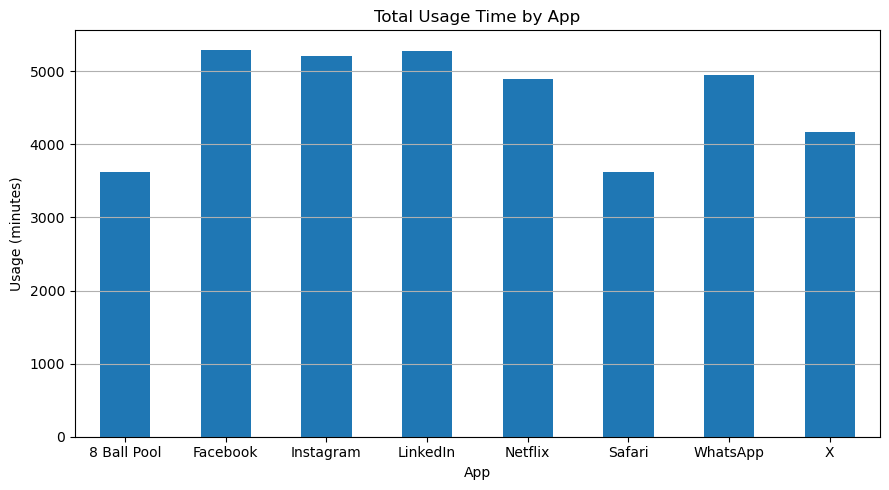

In [47]:
usage_by_app = df.groupby('App')['Total Usage per Day'].sum()
plt.figure(figsize=(9,5))
usage_by_app.plot(kind='bar')
plt.title('Total Usage Time by App')
plt.xlabel('App')
plt.xticks(rotation=0)
plt.ylabel('Usage (minutes)')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

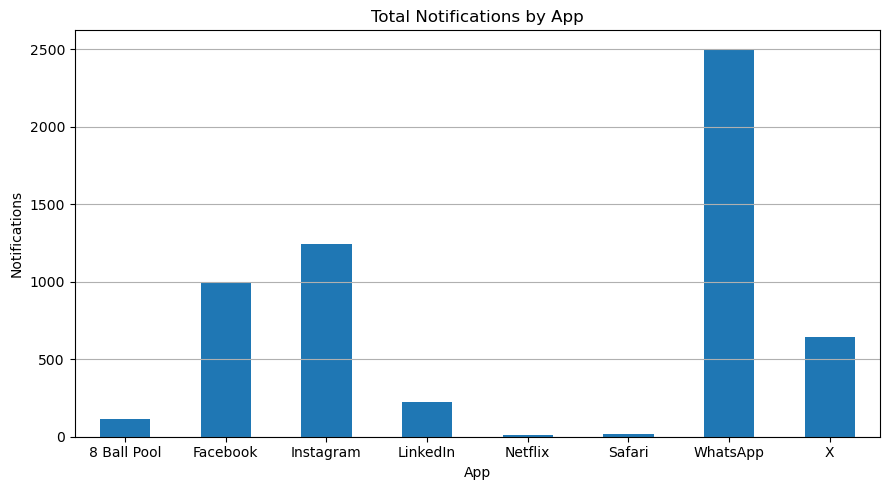

In [49]:
not_by_app = df.groupby('App')['Notifications'].sum()
plt.figure(figsize=(9,5))
not_by_app.plot(kind='bar')
plt.title('Total Notifications by App')
plt.xlabel('App')
plt.xticks(rotation=0)
plt.ylabel('Notifications')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

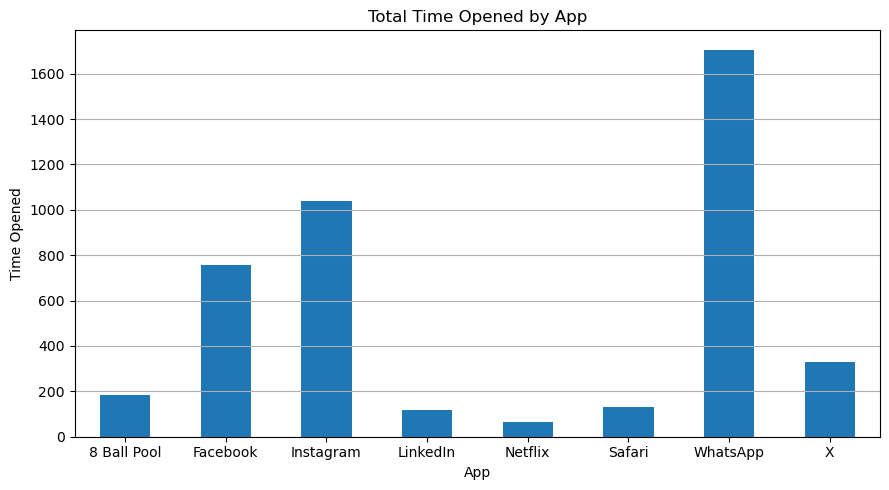

In [51]:
time_by_app = df.groupby('App')['Times Opened'].sum()
plt.figure(figsize=(9,5))
time_by_app.plot(kind='bar')
plt.title('Total Time Opened by App')
plt.xlabel('App')
plt.xticks(rotation=0)
plt.ylabel('Time Opened')
plt.tight_layout()
plt.grid(axis='y')
plt.show()